# Eric-related HUB Process Durations
#### Alan Maydwell, 01/02/2018

Ran queries in PSHUB database on 26/01/2017 (which is refreshed from production with hub jobs set to disabled state) and pasted results to Excel spreadsheet **HubProcessDurations.xlsx**.

Queries were of form:


```
SELECT 
id,
process_code,
hpls_hub_process_log_status,
date_created,
start_time_stamp,
time_stamp,
time_stamp - start_time_stamp as "Duration"
FROM
hub_process_logs
WHERE
process_code = 'EMI05'
and to_date(date_created) > to_date('01/10/2017','DD/MM/YYYY')
ORDER BY
id desc```

They were run for hub processes BEW02, EMI02, EMI03, EMI04 and EMI05.

This document is a Jupyter Notebook that creates graphs from this data.

***
*some technical setup*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_df(df, title=""):
    """plot a pandas dataframe"""
    df.plot(x='TIME_STAMP', figsize=(10,6), marker='.')
    #plt.xticks(rotation=90)
    plt.ylim(ymin=0)
    plt.ylabel("Time(mins)")
    #plt.legend(loc='best')
    plt.legend(loc=3)
    plt.title(title, fontsize=16)

In [3]:
def make_minutes(timething):
    """Converts time string such as 00:18:24.573169 to minutes"""
    hours = timething[:2]
    mins = timething[3:5]
    seconds = timething[6:8]
    ms = timething[8:]
    duration = int(hours)*60 + int(mins) + (int(seconds) + float(ms))/60
    return duration

In [4]:
def process_tab(tab_name, skiprows=2):
    """Read results from specified spreadsheet tab
    and store in dataframe. Also process the times 
    from weird "+00 00:18:16.203833" formate into 
    minutes.
    Returns dataframe
    """
    # Make dataframe from the tab
    df = xl.parse(tab_name, skiprows)
    # Reduce to just the two columns we need
    df = df[["TIME_STAMP", "Duration"]]
    #Strip off leading characters from Duration
    df['Duration'] = df['Duration'].map(lambda x: str(x)[-15:])
    # Below converts to nice date format but unfortunately not suitable for graphs
    ##df.Duration = pd.to_datetime(df.Duration, format="%H:%M:%S.%f")
    # Convert the Duration from HH:MM:SS.f to minutes
    df['Duration'] = df['Duration'].map(make_minutes)
    return df

In [5]:
# Spreadsheet
filename = "HubProcessDurations.xlsx"
xl = pd.ExcelFile(filename)
tabs = xl.sheet_names

*end technical setup*
***

## Hub Job Durations
Note the final 0 value in the EMI03 graph below is due to the job being in progress.

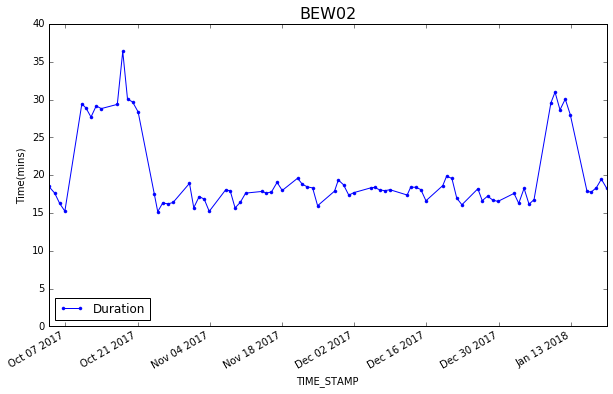

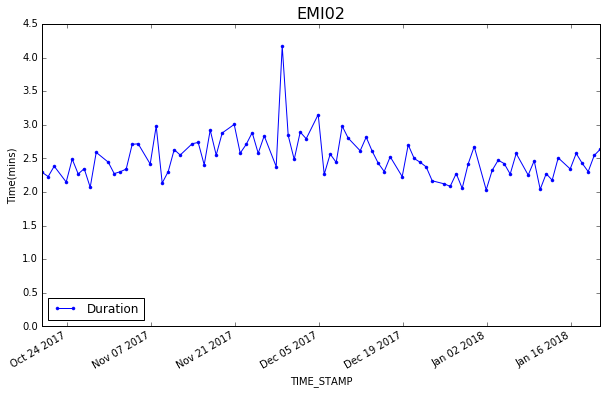

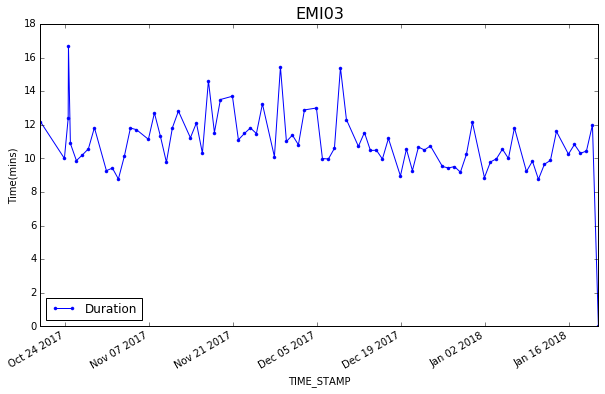

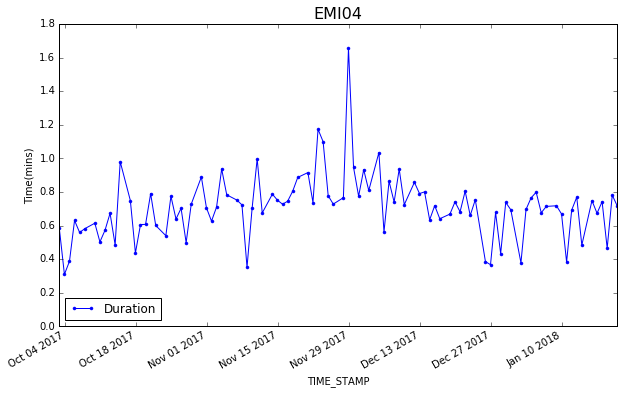

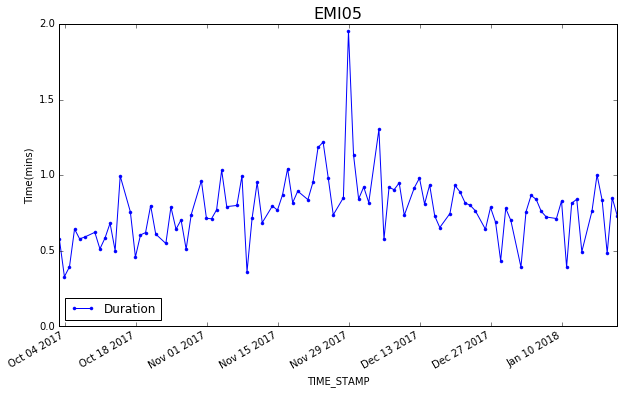

In [6]:
for tab in tabs:
    df = process_tab(tab)
    plot_df(df, title=tab)

## Numerical Data
Durations in minutes

In [7]:
#Extract results from each tab
frames = []
for tab in tabs:
    df = process_tab(tab)
    #Give unique name to columns by adding the tab-name
    df.columns = [tab+" "+column for column in df.columns]
    frames.append(df)
    
#Concatentate the individual frames
combined_df = pd.concat(frames, axis=1)

#Display the frames (with max_rows auto-truncation disabled)
with pd.option_context('display.max_rows', None):
    display(combined_df)

,BEW02 TIME_STAMP,BEW02 Duration,EMI02 TIME_STAMP,EMI02 Duration,EMI03 TIME_STAMP,EMI03 Duration,EMI04 TIME_STAMP,EMI04 Duration,EMI05 TIME_STAMP,EMI05 Duration
0,2018-01-19 23:07:16.510,18.270064,2018-01-20 20:02:48.201,2.634669,2018-01-20 20:00:10.230,0.000000,2018-01-20 20:00:53.133,0.715799,2018-01-20 20:00:54.039,0.729102
1,2018-01-18 22:28:05.802,19.471742,2018-01-19 20:02:39.084,2.543384,2018-01-19 20:12:06.499,11.991871,2018-01-19 20:00:58.954,0.781023,2018-01-19 20:01:37.005,0.850063
2,2018-01-17 23:07:15.670,18.340225,2018-01-18 20:02:23.077,2.303121,2018-01-18 20:10:31.024,10.434748,2018-01-18 20:00:33.405,0.465050,2018-01-18 20:00:34.613,0.484856
3,2018-01-16 22:52:14.566,17.753976,2018-01-17 20:02:33.078,2.426085,2018-01-17 20:10:25.714,10.303407,2018-01-17 20:00:53.472,0.741813,2018-01-17 20:01:33.580,0.835452
4,2018-01-16 03:35:04.381,17.875801,2018-01-16 20:02:41.714,2.573865,2018-01-16 20:10:57.416,10.827200,2018-01-16 20:00:54.204,0.673165,2018-01-16 20:01:31.886,1.002039
5,2018-01-12 21:52:16.864,27.995655,2018-01-15 20:02:25.234,2.342525,2018-01-15 20:10:19.858,10.251997,2018-01-15 20:00:50.272,0.748563,2018-01-15 20:00:51.058,0.761886
6,2018-01-11 22:22:47.679,30.061678,2018-01-13 20:02:38.550,2.507972,2018-01-13 20:11:44.175,11.600837,2018-01-13 20:00:37.103,0.483852,2018-01-13 20:00:37.804,0.493777
7,2018-01-10 21:58:19.102,28.636953,2018-01-12 20:02:20.775,2.175340,2018-01-12 20:10:03.006,9.879005,2018-01-12 20:00:57.891,0.769122,2018-01-12 20:01:25.685,0.840664
8,2018-01-09 22:51:23.558,30.983180,2018-01-11 20:02:23.394,2.272100,2018-01-11 20:09:46.089,9.650376,2018-01-11 20:00:51.361,0.692111,2018-01-11 20:01:22.205,0.814460
9,2018-01-09 03:37:42.063,29.565235,2018-01-10 20:02:06.722,2.038910,2018-01-10 20:08:49.655,8.753466,2018-01-10 20:00:27.935,0.382484,2018-01-10 20:00:28.528,0.392092
